## HEATMAPS

We test the first total_epochs


Each epoch is calculated by binning time_epoch time


All hosts in this time frame are taken into account

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

time_epoch = 60
total_epochs = 100

# hard coded nrows
df_all = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=500000)

df_all.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
              'destination port', 'protocol', 'packet count', 'byte count']

df_all = df_all[df_all['time'] <= time_epoch * total_epochs]
df_all.index = df_all['time']
df_all.drop(columns=['time'],inplace=True)

In [2]:
# get all the host in the buckets we are interested in 

hosts = np.array(list(set(df_all['source computer'].values))) 

print('Testing a total of', len(hosts), 'hosts')

Testing a total of 1894 hosts


# First we will train on the whole dataset 
# TODO addZeros=True

# Ruins the distribution for now

In [3]:
from helper import group_scale_data, group_scale_data_batch

groupped_data, hosts, parameters = group_scale_data(df_all, size_of_bin_seconds=time_epoch,
                                                    doScale=True, addZeros=True, scaler='log', hosts=hosts, verbose=1)

A total of 100 time epochs have been encountered
Done with 0 hosts out of 1894
Done with 94 hosts out of 1894
Done with 188 hosts out of 1894
Done with 282 hosts out of 1894
Done with 376 hosts out of 1894
Done with 470 hosts out of 1894
Done with 564 hosts out of 1894
Done with 658 hosts out of 1894
Done with 752 hosts out of 1894
Done with 846 hosts out of 1894
Done with 940 hosts out of 1894
Done with 1034 hosts out of 1894
Done with 1128 hosts out of 1894
Done with 1222 hosts out of 1894
Done with 1316 hosts out of 1894
Done with 1410 hosts out of 1894
Done with 1504 hosts out of 1894
Done with 1598 hosts out of 1894
Done with 1692 hosts out of 1894
Done with 1786 hosts out of 1894
Done with 1880 hosts out of 1894
Scaeling...


In [4]:
from emClustering import OnlineEM
from plots import plot_points, plot_results, plot_category, plot_all_categories
from kplusplus import KPlusPlus

In [5]:
mixtures = 15

kplusplus = KPlusPlus(mixtures, groupped_data.values[:, :2], stochastic=True, stochastic_n_samples=3000)

kplusplus.init_centers(verbose=1)

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, kplusplus.centers, 500, n_clusters=8, verbose=1, update_power=0.5)

Centers found: 1
Centers found: 2
Centers found: 3
Centers found: 4
Centers found: 5
Centers found: 6
Centers found: 7
Centers found: 8
Centers found: 9
Centers found: 10
Centers found: 11
Centers found: 12
Centers found: 13
Centers found: 14
Centers found: 15


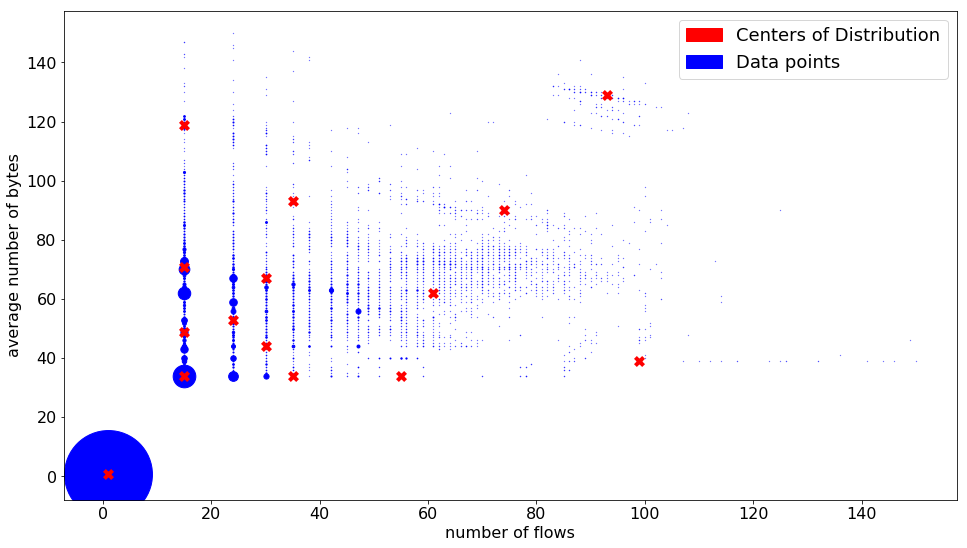

In [6]:
plot_points(groupped_data.values[:, :2], onlineEM)

In [7]:
# ignore epoch index for now

data = groupped_data.values[:,[0,1,3]]

np.random.shuffle(data)


onlineEM.fit(data)

Running for data till position 500 from total 189400
Running for data till position 1000 from total 189400
Running for data till position 1500 from total 189400
Running for data till position 2000 from total 189400
Running for data till position 2500 from total 189400
Running for data till position 3000 from total 189400
Running for data till position 3500 from total 189400
Running for data till position 4000 from total 189400
Running for data till position 4500 from total 189400
Running for data till position 5000 from total 189400
Running for data till position 5500 from total 189400
Running for data till position 6000 from total 189400
Running for data till position 6500 from total 189400
Running for data till position 7000 from total 189400
Running for data till position 7500 from total 189400
Running for data till position 8000 from total 189400
Running for data till position 8500 from total 189400
Running for data till position 9000 from total 189400
Running for data till positio

Running for data till position 75500 from total 189400
Running for data till position 76000 from total 189400
Running for data till position 76500 from total 189400
Running for data till position 77000 from total 189400
Running for data till position 77500 from total 189400
Running for data till position 78000 from total 189400
Running for data till position 78500 from total 189400
Running for data till position 79000 from total 189400
Running for data till position 79500 from total 189400
Running for data till position 80000 from total 189400
Running for data till position 80500 from total 189400
Running for data till position 81000 from total 189400
Running for data till position 81500 from total 189400
Running for data till position 82000 from total 189400
Running for data till position 82500 from total 189400
Running for data till position 83000 from total 189400
Running for data till position 83500 from total 189400
Running for data till position 84000 from total 189400
Running fo

Running for data till position 149500 from total 189400
Running for data till position 150000 from total 189400
Running for data till position 150500 from total 189400
Running for data till position 151000 from total 189400
Running for data till position 151500 from total 189400
Running for data till position 152000 from total 189400
Running for data till position 152500 from total 189400
Running for data till position 153000 from total 189400
Running for data till position 153500 from total 189400
Running for data till position 154000 from total 189400
Running for data till position 154500 from total 189400
Running for data till position 155000 from total 189400
Running for data till position 155500 from total 189400
Running for data till position 156000 from total 189400
Running for data till position 156500 from total 189400
Running for data till position 157000 from total 189400
Running for data till position 157500 from total 189400
Running for data till position 158000 from total

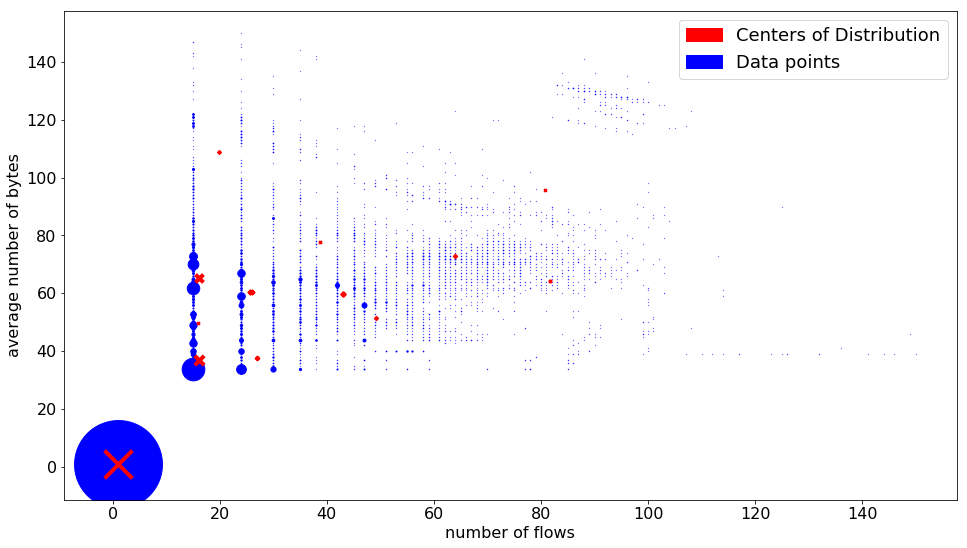

In [8]:
plot_points(groupped_data.values[:, :2], onlineEM)

### First we shall explore how the average values shift between different hosts and different epochs in our dataset

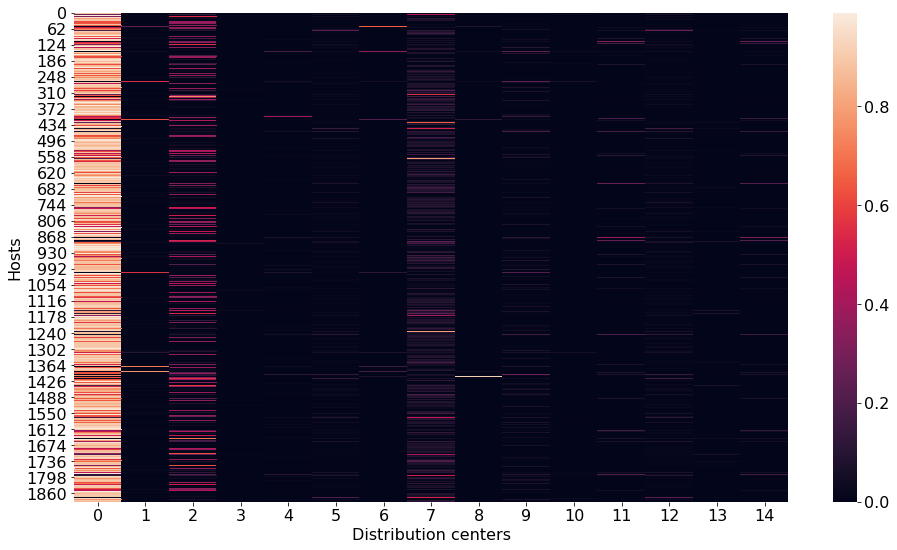

In [9]:
# HOST and clusters
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams['font.size'] = 16

heatmap_hosts = np.zeros(shape=(len(hosts), onlineEM.m))

for i, host in enumerate(hosts):
    heatmap_hosts[i] = onlineEM.hosts[host]['group']
    
ax = sns.heatmap(heatmap_hosts)
plt.ylabel('Hosts')
plt.xlabel('Distribution centers')
plt.show()

In [11]:
onlineEM.lambdas

array([[1.0, 1.0],
       [63.87872392831015, 72.90952428518175],
       [16.110363959126577, 36.86462584547543],
       [19.87657562242242, 108.86134603087761],
       [49.159057241243985, 51.4530053344358],
       [25.947576055152492, 60.529719744414976],
       [81.70776756200283, 64.31842264711067],
       [16.1341312392568, 65.44957764929708],
       [80.8419720362741, 95.56908117630933],
       [43.092211792825815, 59.73259547728836],
       [38.669164601740846, 77.81994664751913],
       [27.057223193513323, 37.51862781684751],
       [25.73307762431615, 60.61481607959041],
       [15.896412483466351, 49.63646126055067],
       [27.05075550546185, 37.51627923781848]], dtype=object)

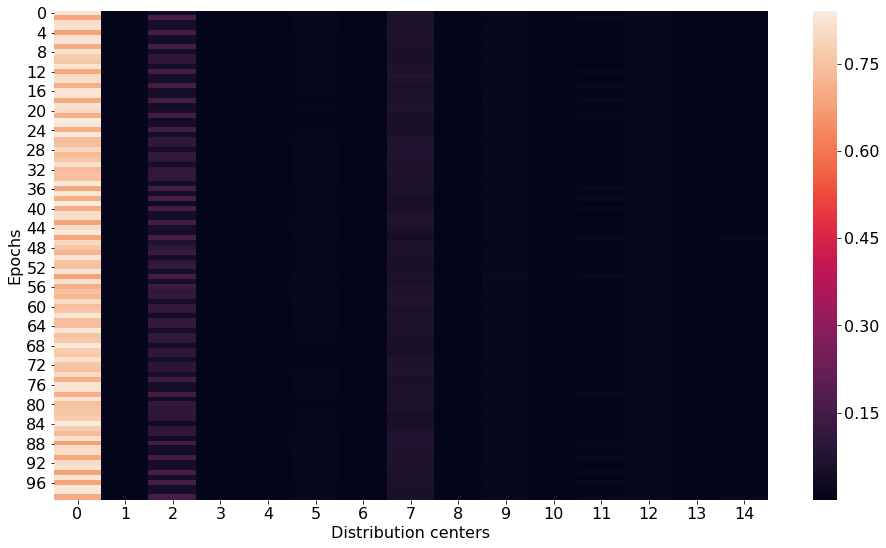

In [12]:
heatmap_epochs = np.zeros(shape=(total_epochs, onlineEM.m))

for i in range(total_epochs):
    df = df_all[(df_all.index > i * time_epoch) & (df_all.index <= (i + 1) * time_epoch)]
    groupped_data_epoch, _ = group_scale_data_batch(df, parameters)
    data = groupped_data_epoch.values[:,[0,1,3]]
    
    f = onlineEM.calculate_participation(data)

    temp_sum = f.sum(axis=0)
    
    heatmap_epochs[i] = temp_sum / sum(temp_sum)
    
    
ax = sns.heatmap(heatmap_epochs)
plt.ylabel('Εpochs')
plt.xlabel('Distribution centers')
plt.show()

In [13]:
onlineEM.gammas

array([ 0.77171947,  0.00675688,  0.08728461,  0.00463099,  0.00610485,
        0.01072435,  0.00288674,  0.06254781,  0.00184499,  0.01430387,
        0.00232167,  0.00792385,  0.01244974,  0.00210975,  0.00639041])

In [14]:
onlineEM.lambdas

array([[1.0, 1.0],
       [63.87872392831015, 72.90952428518175],
       [16.110363959126577, 36.86462584547543],
       [19.87657562242242, 108.86134603087761],
       [49.159057241243985, 51.4530053344358],
       [25.947576055152492, 60.529719744414976],
       [81.70776756200283, 64.31842264711067],
       [16.1341312392568, 65.44957764929708],
       [80.8419720362741, 95.56908117630933],
       [43.092211792825815, 59.73259547728836],
       [38.669164601740846, 77.81994664751913],
       [27.057223193513323, 37.51862781684751],
       [25.73307762431615, 60.61481607959041],
       [15.896412483466351, 49.63646126055067],
       [27.05075550546185, 37.51627923781848]], dtype=object)